In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/news2.csv')
df.head()

,title,short_content,content,types
0,Ex-doctor goes on trial in France over Rwanda ...,"Sosthene Munyemana, 68, is accused of orga...",A Rwandan former gynecologist went on trial in...,/en/global-issues/
1,"Being gay and Catholic, a difficult journey 'b...",Some Catholics experience an ongoing inter...,Antoine knew his identity early on and has nev...,/en/global-issues/
2,At least 14 French airports receive bomb threats,After a number of major French airports we...,At least 14 French airports received bomb thre...,/en/global-issues/
3,India's Supreme Court declines to legalize sam...,The judges felt they had no authority to r...,Same-sex marriage will not be allowed in India...,/en/global-issues/
4,Mexico: Three separate armed attacks leave 24 ...,In an 'extraordinary' outbreak of pre-elec...,Three separate armed attacks in Mexico on Mond...,/en/global-issues/


In [2]:
df['types'] = df['types'].apply(lambda x:x[4:])
df['types'] = df['types'].apply(lambda x:x[:-1])
df['types'] = df['types'].str.capitalize()

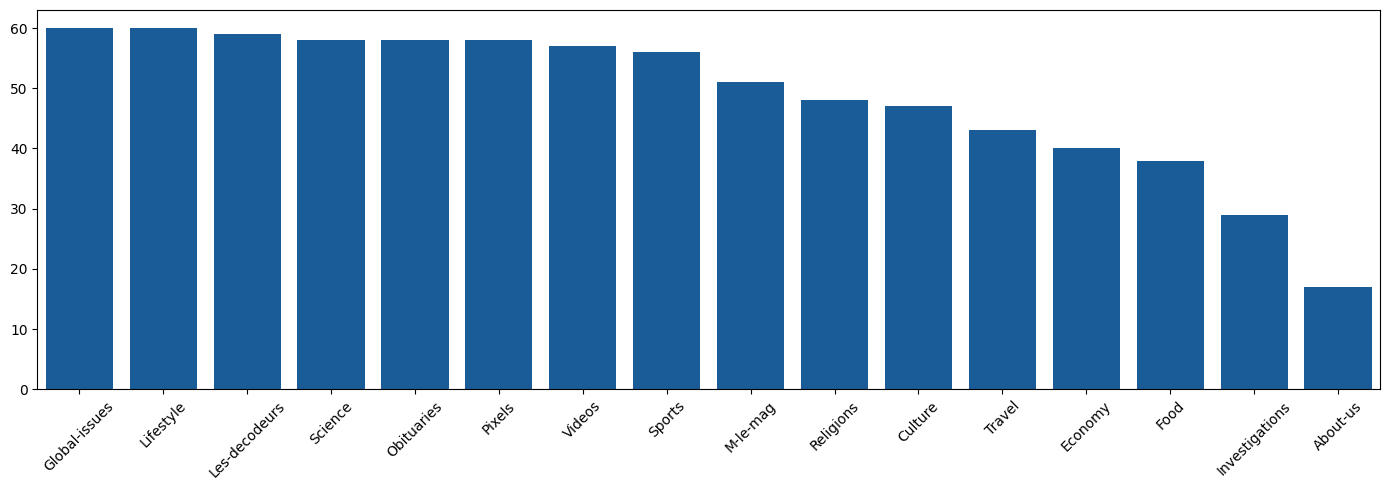

In [3]:
label_count = df['types'].value_counts()

plt.figure(figsize=(14,5))
sns.barplot(x=label_count.index,y=label_count.values,color='#055dac')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
df['content'].iloc[3]

'Same-sex marriage will not be allowed in India. On Tuesday, October 17, the Indian Supreme Court rejected the applications of 21 petitioners, including same-sex couples, trans people and associations. The judges considered that they were not empowered to make such a decision and referred this responsibility to Parliament, as the government had wanted.The hopes of the LGBT+ community were high, as India\'s highest court had issued a landmark ruling in 2018 decriminalizing homosexuality. The only notable progress concerned marriage for couples where one of the members is transgender. The Supreme Court considered that there is no obstacle to transsexual people entering into marriage, provided they are identified as a "man" and a "woman" respectively.It is unlikely that Modi\'s government will be tempted to legislate, as the judges are urging. During hearings in April and May, the prime minister\'s representative had expressed his hostility to same-sex marriage in the name of the unity of

In [5]:
import re
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()  # lower-case all characters
        text = re.sub(r'@\S+', '', text)  # remove twitter handles
        text = re.sub(r'http\S+', '', text)  # remove urls
        text = re.sub(r'pic.\S+', '', text)
        text = re.sub(r"[^a-zA-Z+']", ' ', text)  # only keeps characters
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # keep words with length>1 only
        text = "".join([i for i in text if i not in string.punctuation])
        words = nltk.tokenize.word_tokenize(text)
        stopwords = nltk.corpus.stopwords.words('english')  # remove stopwords
        text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
        text = re.sub("\s[\s]+", " ", text).strip()  # remove repeated/leading/trailing spaces
    else:
        text = ''  # If not a string, set text to an empty string
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df['new_content'] = df['content'].apply(clean_text)

In [7]:
df['new_content'].iloc[3]

'sex marriage allowed india tuesday october indian supreme court rejected applications petitioners including sex couples trans people associations judges considered empowered make decision referred responsibility parliament government wanted hopes lgbt community high indias highest court issued landmark ruling decriminalizing homosexuality notable progress concerned marriage couples one members transgender supreme court considered obstacle transsexual people entering marriage provided identified man woman respectively unlikely modis government tempted legislate judges urging hearings april may prime ministers representative expressed hostility sex marriage name unity family arguing consisted husband wife children interference area would completely upset delicate balance laws relating individual country values accepted society claimed doubt bjp modis bharatiya janata party would even want issue debated parliament let alone passed law commented shashi tharoor congress main opposition par

In [8]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
stemmed = []

for i in range(len(df)):
  stemmed_list = []
  for w in word_tokenize(df['new_content'].iloc[i]):
    stemmed_list.append(ps.stem(w))
  stemmed.append(stemmed_list)

df['stem'] = stemmed

In [9]:
df['stem'] = df['stem'].apply(' '.join)

In [10]:
df.head()

,title,short_content,content,types,new_content,stem
0,Ex-doctor goes on trial in France over Rwanda ...,"Sosthene Munyemana, 68, is accused of orga...",A Rwandan former gynecologist went on trial in...,Global-issues,rwandan former gynecologist went trial france ...,rwandan former gynecologist went trial franc t...
1,"Being gay and Catholic, a difficult journey 'b...",Some Catholics experience an ongoing inter...,Antoine knew his identity early on and has nev...,Global-issues,antoine knew identity early never doubted sinc...,antoin knew ident earli never doubt sinc year ...
2,At least 14 French airports receive bomb threats,After a number of major French airports we...,At least 14 French airports received bomb thre...,Global-issues,least french airports received bomb threats th...,least french airport receiv bomb threat thursd...
3,India's Supreme Court declines to legalize sam...,The judges felt they had no authority to r...,Same-sex marriage will not be allowed in India...,Global-issues,sex marriage allowed india tuesday october ind...,sex marriag allow india tuesday octob indian s...
4,Mexico: Three separate armed attacks leave 24 ...,In an 'extraordinary' outbreak of pre-elec...,Three separate armed attacks in Mexico on Mond...,Global-issues,three separate armed attacks mexico monday lef...,three separ arm attack mexico monday left leas...


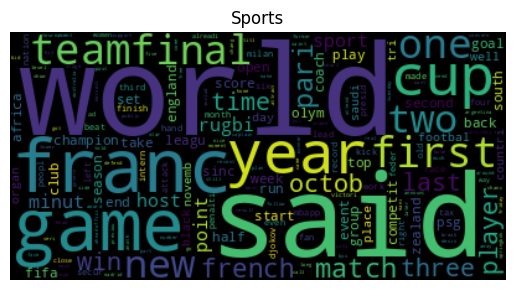

In [11]:
from wordcloud import WordCloud

def create_wordcloud(data):
  text = df[df['types']==data]
  text_cloud = ''.join(txt for txt in text['stem'])
  cloud = WordCloud(collocations=False, background_color='black').generate(text_cloud)
  plt.imshow(cloud,interpolation='bilinear')
  plt.title(data)
  plt.axis('off')
  plt.show()
create_wordcloud('Sports')

In [12]:
df['Check'] = (df['types'] == 'About-us') | (df['types'] == 'Culture') | (df['types'] == 'Lifestyle')  | (df['types'] == 'M-le-mag') | (df['types'] == 'Les-decodeurs')

df = df[df['Check'] == False]

In [13]:
df = df[df['Check'] == False]

In [14]:
df.drop(columns='Check',inplace=True)

In [15]:
df['types'].value_counts()

Global-issues     60
Science           58
Obituaries        58
Pixels            58
Videos            57
Sports            56
Religions         48
Travel            43
Economy           40
Food              38
Investigations    29
Name: types, dtype: int64

In [19]:
#df.to_csv('ProcessData.csv',index=False)

#**model**

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

x = df['stem']

X_train,X_test,y_train,y_test = train_test_split(df['new_content'],df['types'],test_size=0.15,random_state=123,shuffle=True,stratify=df['types'])

pipe1 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('Classifer',MultinomialNB(alpha=0.005))])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))


Accuracy Score: 0.78
                precision    recall  f1-score   support

       Economy       0.56      0.83      0.67         6
          Food       0.75      1.00      0.86         6
 Global-issues       0.83      0.56      0.67         9
Investigations       1.00      0.50      0.67         4
    Obituaries       0.89      0.89      0.89         9
        Pixels       0.82      1.00      0.90         9
     Religions       0.70      1.00      0.82         7
       Science       0.86      0.67      0.75         9
        Sports       0.78      0.88      0.82         8
        Travel       0.71      0.83      0.77         6
        Videos       1.00      0.44      0.62         9

      accuracy                           0.78        82
     macro avg       0.81      0.78      0.77        82
  weighted avg       0.81      0.78      0.77        82



In [58]:
import pickle

pickle.dump(pipe1,open('model.pkl','wb'))

In [59]:
model = pickle.load(open('/content/model.pkl','rb'))

In [60]:
def recommend_news(Head):
  indexs = df[df['title'] == Head].index[0]
  contents = df['new_content'].iloc[indexs]
  pred = model.predict([contents])[0]
  results = df[df['types']==pred][['title','short_content']].sample(5)
  return results